<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [3]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [84]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [5]:
df=yelp[['business_id', 'cool', 'date','funny','stars','text','useful']]
df.head()

,business_id,cool,date,funny,stars,text,useful
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,4,Came here for lunch Togo. Service was quick. S...,0
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,3,I've been to Vegas dozens of times and had nev...,2
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,1,We went here on a night where they closed off ...,5
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [7]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [110]:
stopWords=list(STOPWORDS)
def tokenize(data):
    tokens=[]
    for token in simple_preprocess(data):
        if token not in stopWords:
            tokens.append(token)
    return tokens
df['tokens']=df['text'].apply(tokenize)

/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [15]:
tfidf=TfidfVectorizer(stop_words=stopWords)

In [17]:
dtm=tfidf.fit_transform(df['tokens'].apply(lambda x: ' '.join(x)))

In [20]:
dtm=pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [23]:
nn=NearestNeighbors(n_neighbors=10, algorithm='kd_tree')

In [24]:
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [26]:
review='the coffee was disgusting. Im never going back to that place. The wait staff was rude and disorganized'

In [33]:
nn.kneighbors(tfidf.transform([review]).todense())

(array([[1.20514607, 1.23532225, 1.23895502, 1.24359223, 1.2491894 ,
         1.26960637, 1.27752149, 1.2790384 , 1.28251824, 1.28402558]]),
 array([[ 802, 9900, 9676, 2406, 8283, 4867, 1237, 8493, 6182, 3789]]))

In [35]:
for i in [ 802, 9900, 9676, 2406, 8283, 4867, 1237, 8493, 6182, 3789]:
    print(df.loc[i, 'text'])
    print()

I swear this place gets better everytime i go....i think im addicted.....the staff is great and the food i feel like im in heaven.... my mom even enjoys it just as much as i do

How they make a person wait  2 hours for a 2 min results reading is disgusting ....terrible

This hotel charged me for a room service that i didn't order!!!!! I never saw that in my life and i travel very often im never going back

Worst service ever ... no staff n too much crowd.. food was not at all fresh ... rude staff... made on call reservation but still need to wait for 1hr 20min ... first n last visit to this place

Love this place!  I'm a huuuuuge coffee addict (don't talk to me if I haven't had my coffee lol). When this place opened I was so excited. A fast close by coffee place best thing didn't have to drive to starbucks and wait the long lines for an expensive coffee.
My faves are the lattes and caramel machiato. Yum! The staff is super friendly, fun and best of all affordable. Love the little stick

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [43]:
X=df['text']
y=df['stars']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [45]:
vect=TfidfVectorizer(stop_words=stopWords)
classifier=RandomForestClassifier()

pipe=Pipeline([
    ('vect', vect),
    ('class', classifier)
])

parameters={
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'class__n_estimators':(5, 10,),
    'class__max_depth':(15,20)
}

grid_search=GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   33.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.75, 1.0), 'vect__min_df': (0.02, 0.05), 'vect__max_features': (500, 1000), 'class__n_estimators': (5, 10), 'class__max_depth': (15, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [47]:
grid_search.best_score_

0.5388

In [49]:
grid_search.score(X_test, y_test)

0.5348

In [51]:
grid_search.predict([review])

array([1])

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [71]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
import re

Learn the vocubalary of the yelp data:

In [135]:
id2word = Dictionary(df['tokens'])
id2word.token2id['coffee']

1211

In [136]:
len(id2word.keys())

26475

In [139]:
id2word.filter_extremes(no_below=10, no_above=.8)

In [140]:
len(id2word.keys())

4782

Create a bag of words representation of the entire corpus

In [141]:
corpus = [id2word.doc2bow(text) for text in df['tokens']]

Your LDA model should be ready for estimation: 

In [142]:
num_topics=9
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=6, #I have six cores. Your millage may varry. 
                   num_topics = num_topics # You can change this parameter
                  )

/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator))

Create 1-2 visualizations of the results

In [143]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

In [144]:
distro=[lda[d] for d in corpus]
def update(data):
    dist={k:0 for k in range(num_topics)}
    for t in data: 
        dist[t[0]]=t[1]
    return dist
new_dist=[update(x) for x in distro]

In [145]:
dense=pd.DataFrame.from_records(new_dist)
dense.columns=topics

In [146]:
dense['stars']=df['stars']

In [147]:
stars=dense.groupby('stars').mean()

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

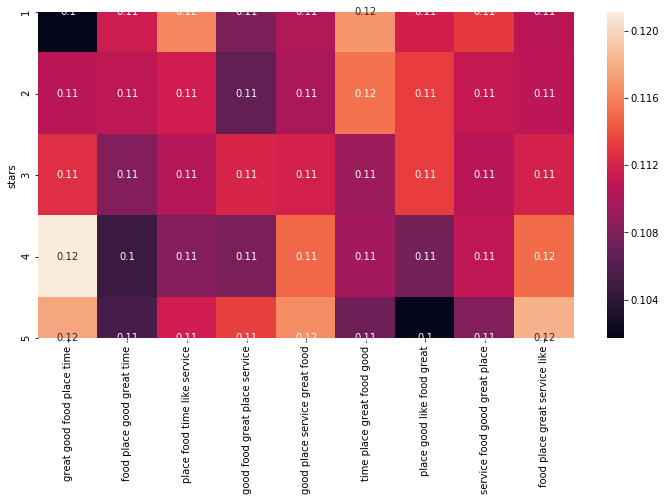

In [149]:
plt.figure(figsize=(12,6))
sns.heatmap(stars, annot=True)

In [150]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [151]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.000126  0.003746       1        1  11.228031
2     -0.002306  0.002405       2        1  11.168030
8     -0.005669 -0.000619       3        1  11.154520
5     -0.000764  0.001758       4        1  11.149791
4      0.001995 -0.004204       5        1  11.114908
6      0.001071 -0.003634       6        1  11.106601
7     -0.001075 -0.001791       7        1  11.066531
3      0.006156  0.002139       8        1  11.045579
1      0.000466  0.000200       9        1  10.966012, topic_info=     Category         Freq        Term        Total  loglift  logprob
37    Default  4763.000000        good  4763.000000  30.0000  30.0000
133   Default  5014.000000        food  5014.000000  29.0000  29.0000
31    Default  3402.000000        time  3402.000000  28.0000  28.0000
42    Default  3651.000000     service  3651.000000  27.0000  27.0000
83    Default  1725.000000        nice  1725.000000  26.0000  26.0000
15    Default  3512.000000        like  3512.000000  25.0000  25.0000
188   Default  4246.000000       great  4246.000000  24.0000  24.0000
317   Default  1449.000000  definitely  1449.000000  23.0000  23.0000
122   Default  4776.000000       place  4776.000000  22.0000  22.0000
176   Default  1331.000000     amazing  1331.000000  21.0000  21.0000
104   Default  1905.000000          ve  1905.000000  20.0000  20.0000
36    Default  1371.000000    friendly  1371.000000  19.0000  19.0000
881   Default  1159.000000         new  1159.000000  18.0000  18.0000
168   Default  1152.000000   recommend  1152.000000  17.0000  17.0000
43    Default  1577.000000       staff  1577.000000  16.0000  16.0000
68    Default  2050.000000         got  2050.000000  15.0000  15.0000
638   Default  1671.000000        love  1671.000000  14.0000  14.0000
106   Default  1480.000000        went  1480.000000  13.0000  13.0000
365   Default   936.000000        took   936.000000  12.0000  12.0000
187   Default  1167.000000       going  1167.000000  11.0000  11.0000
33    Default  1007.000000        wait  1007.000000  10.0000  10.0000
348   Default   807.000000       pizza   807.000000   9.0000   9.0000
85    Default   942.000000       night   942.000000   8.0000   8.0000
393   Default  1201.000000         day  1201.000000   7.0000   7.0000
126   Default   950.000000         bar   950.000000   6.0000   6.0000
570   Default  1440.000000  restaurant  1440.000000   5.0000   5.0000
328   Default   942.000000       fresh   942.000000   4.0000   4.0000
302   Default   693.000000     awesome   693.000000   3.0000   3.0000
311   Default  1451.000000        come  1451.000000   2.0000   2.0000
634   Default   769.000000        home   769.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
663    Topic9    89.359695       years   639.763123   0.2419  -6.2602
1182   Topic9    57.794697      tasted   391.166473   0.2981  -6.6960
31     Topic9   372.540070        time  3402.723145  -0.0016  -4.8325
448    Topic9    89.464172      prices   653.082825   0.2225  -6.2591
1039   Topic9   170.141663     chicken  1400.293701   0.1026  -5.6163
127    Topic9   109.516647         bit   832.445251   0.1821  -6.0568
122    Topic9   467.938599       place  4776.587891  -0.1128  -4.6046
15     Topic9   362.278137        like  3512.731445  -0.0614  -4.8605
106    Topic9   175.094315        went  1480.181396   0.0758  -5.5876
233    Topic9   155.699265  experience  1280.772095   0.1031  -5.7050
37     Topic9   445.593964        good  4763.647461  -0.1590  -4.6535
1029   Topic9   177.816269     ordered  1533.202759   0.0560  -5.5721
188    Topic9   392.732208       great  4246.350098  -0.1703  -4.7798
120    Topic9   162.423172      people  1415.279419   0.0455  -5.6627
353    Topic9   109.936577       sauce   843.208069   0.1731  -6.0530
311    Topic9   162.997055        come  1451.765137   0.0236  -5.6592
68 

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)